In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

from time import time
import random

# Data Pre-processing

In [2]:
def decontracted(phrase): # decontract all the words that are contracted 
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", "not", phrase)
    phrase = re.sub(r"\re", "are", phrase)
    phrase = re.sub(r"\'s", "is", phrase)
    phrase = re.sub(r"\'d", "would", phrase)
    phrase = re.sub(r"\'ll", "will", phrase)
    phrase = re.sub(r"\'ve", "have", phrase)
    phrase = re.sub(r"\'v", "very", phrase)
    phrase = re.sub(r"\'t", "not", phrase)
    phrase = re.sub(r"\'m", "am", phrase)
    return phrase

In [3]:
# define all the name of each columns
reviewerID = []
productID = []
liked_and_seen = []
reviewText = []
rating = []
summary = []
unixTime = []
date = []

# import the data
from google.colab import files
upload = files.upload()



Saving data.json to data.json


In [4]:
with open('data.json') as json_data:
    df = json.load(json_data)

In [5]:
# assign names to each columns
for i in range(len(df)):
    productID.append(df[i]['asin'])
    reviewerID.append(df[i]['reviewerID'])
    reviewText.append(decontracted(df[i]['reviewText']))
    rating.append(df[i]['overall'])
    summary.append(df[i]['summary'])
    unixTime.append(df[i]['unixReviewTime'])
    liked_and_seen.append(df[i]['helpful'])
    date.append(df[i]['reviewTime'])

In [6]:
# now we can create a new and labeled dataset using pandas
from pandas import DataFrame
df = DataFrame({'reviewerID': reviewerID, 'productID': productID, 'liked_and_seen': liked_and_seen, 'reviewText': reviewText, 'summary': summary, 'unixTime': unixTime, 'date': date, 'rating': rating})
df.head()

,reviewerID,productID,liked_and_seen,reviewText,summary,unixTime,date,rating
0,A30TL5EWN6DFXT,120401325X,"[0, 0]",They look good and stick good! I just donot li...,Looks Good,1400630400,"05 21, 2014",4.0
1,ASY55RVNIL0UD,120401325X,"[0, 0]",These stickers work like the review says they ...,Really great product.,1389657600,"01 14, 2014",5.0
2,A2TMXE2AFO7ONB,120401325X,"[0, 0]",These are awesome and make my phone look so st...,LOVE LOVE LOVE,1403740800,"06 26, 2014",5.0
3,AWJ0WZQYMYFQ4,120401325X,"[4, 4]",Item arrived in great time and was in perfect ...,Cute!,1382313600,"10 21, 2013",4.0
4,ATX7CZYFXI1KW,120401325X,"[2, 3]","awesome! stays on, and looks great. can be use...",leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",5.0


In [ ]:
df.describe()

,unixTime,rating
count,3.362000e+04,33620.000000
mean,1.334804e+09,3.977484
std,5.148903e+07,1.323693
min,9.828000e+08,1.000000
25%,1.305763e+09,3.000000
50%,1.351469e+09,5.000000
75%,1.370909e+09,5.000000
max,1.405901e+09,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33620 entries, 0 to 33619
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      33620 non-null  object 
 1   productID       33620 non-null  object 
 2   liked_and_seen  33620 non-null  object 
 3   reviewText      33620 non-null  object 
 4   summary         33620 non-null  object 
 5   unixTime        33620 non-null  int64  
 6   date            33620 non-null  object 
 7   rating          33620 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
df.isnull().any()

reviewerID        False
productID         False
liked_and_seen    False
reviewText        False
summary           False
unixTime          False
date              False
rating            False
dtype: bool

In [ ]:
df['rating'].value_counts()

5.0    17317
4.0     6855
3.0     3962
1.0     3140
2.0     2346
Name: rating, dtype: int64

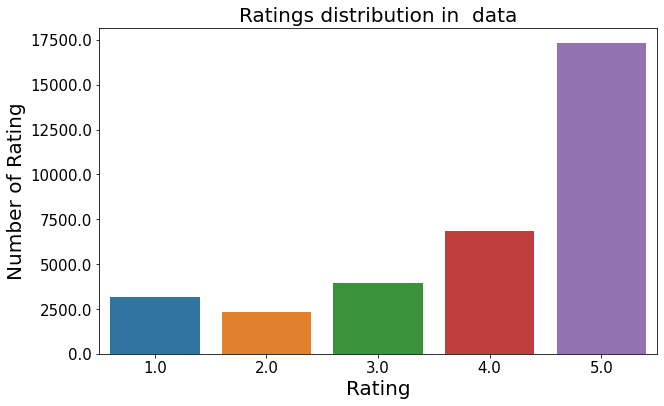

<Figure size 432x288 with 0 Axes>

In [ ]:
# Count the number of ratings in the dataset: 
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "rating",data = df)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Ratings distribution in  data", fontsize = 20)
plt.xlabel("Rating", fontsize = 20)
plt.ylabel("Number of Rating", fontsize = 20)
plt.show()  
plt.savefig('Rating_count.jpg')

# Cleaning and Processing Data

## Tokenization

In [7]:
# spliting the dataset
from sklearn.model_selection import train_test_split
TRAIN_SIZE = 0.8 
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 26896
TEST size: 6724


In [8]:
start_time = time()

from nltk.tokenize import TweetTokenizer
# The reduce_len parameter will allow a maximum of 3 consecutive repeating characters, while trimming the rest
tk = TweetTokenizer(reduce_len=True)
reviewText = int()
data = []

# Separating our features (reviewText) and the rating into two lists to smoothen our work
X = df['reviewText'].tolist()
Y = df['rating'].tolist()

# Building our data list, that is a list of tuples, where each tuple is a pair of the tokenized text
# and its corresponding label
for x, y in zip(X, Y):
    if y == 3:
      data.append((tk.tokenize(x), 1))
    else:
      
      data.append((tk.tokenize(x), 0))
        
# Printing the CPU time and the first 5 elements of our 'data' list
print('CPU Time:', time() - start_time)
data[1]

CPU Time: 8.349312782287598


(['These',
  'stickers',
  'work',
  'like',
  'the',
  'review',
  'says',
  'they',
  'do',
  '.',
  'They',
  'stick',
  'on',
  'great',
  'and',
  'they',
  'stay',
  'on',
  'the',
  'phone',
  '.',
  'They',
  'are',
  'super',
  'stylish',
  'and',
  'I',
  'can',
  'share',
  'them',
  'with',
  'my',
  'sister',
  '.',
  ':)'],
 0)

## Lemmetization



In [9]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

# Previewing the pos_tag() output
print(pos_tag(data[0][0]))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('They', 'PRP'), ('look', 'VBP'), ('good', 'JJ'), ('and', 'CC'), ('stick', 'JJ'), ('good', 'JJ'), ('!', '.'), ('I', 'PRP'), ('just', 'RB'), ('donot', 'VBP'), ('like', 'IN'), ('the', 'DT'), ('rounded', 'JJ'), ('shape', 'NN'), ('because', 'IN'), ('I', 'PRP'), ('was', 'VBD'), ('always', 'RB'), ('bumping', 'VBG'), ('it', 'PRP'), ('and', 'CC'), ('Siri', 'NNP'), ('kept', 'VBD'), ('popping', 'VBG'), ('up', 'RP'), ('and', 'CC'), ('it', 'PRP'), ('was', 'VBD'), ('irritating', 'VBG'), ('.', '.'), ('I', 'PRP'), ('just', 'RB'), ('will', 'MD'), ('not', 'RB'), ('buy', 'VB'), ('a', 'DT'), ('product', 'NN'), ('like', 'IN'), ('this', 'DT'), ('again', 'RB')]


In [10]:
import nltk
nltk.download('wordnet')
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        # First, I will convert the pos_tag output tags to a tag format that the WordNetLemmatizer can interpret
        # In general, if a tag starts with NN, the word is a noun and if it stars with VB, the word is a verb.
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

# Previewing the WordNetLemmatizer() output
print(lemmatize_sentence(data[0][0]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['They', 'look', 'good', 'and', 'stick', 'good', '!', 'I', 'just', 'donot', 'like', 'the', 'rounded', 'shape', 'because', 'I', 'be', 'always', 'bump', 'it', 'and', 'Siri', 'keep', 'pop', 'up', 'and', 'it', 'be', 'irritate', '.', 'I', 'just', 'will', 'not', 'buy', 'a', 'product', 'like', 'this', 'again']


In [11]:
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')

# A custom function defined in order to fine-tune the cleaning of the input text. This function is highly dependent on each usecase.
# Note: Only include misspelling or abbreviations of commonly used words. Including many minimally present cases would negatively impact the performance. 
def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token == 'amp' or token == 'quot' or token == 'lt' or token == 'gt' or token == '½25':
        return ''
    return token

# This function will be our all-in-one noise removal function
def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Eliminating the token if it is a link
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        cleaned_token = cleaned(token.lower())
        
        # Eliminating the token if its length is less than 3, if it is a punctuation or if it is a stopword
        if cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOP_WORDS:
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens

# Prevewing the remove_noise() output
print(remove_noise(data[0][0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['look', 'good', 'stick', 'good', 'donot', 'like', 'rounded', 'shape', 'always', 'bump', 'siri', 'keep', 'pop', 'irritate', 'buy', 'product', 'like']


In [12]:
start_time = time()

def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)
cleaned_tokens_list = []

# Removing noise from all the data
for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

final_data = []

# Transforming the data to fit the input structure of the Naive Bayesian classifier
for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))
    
print('Data Prepared for model, CPU Time:', time() - start_time)

# Previewing our final (tokenized, cleaned and lemmatized) data list
final_data[:5]

Removed Noise, CPU Time: 140.50067520141602
Data Prepared for model, CPU Time: 0.3167428970336914


[({'always': True,
   'bump': True,
   'buy': True,
   'donot': True,
   'good': True,
   'irritate': True,
   'keep': True,
   'like': True,
   'look': True,
   'pop': True,
   'product': True,
   'rounded': True,
   'shape': True,
   'siri': True,
   'stick': True},
  0),
 ({'great': True,
   'like': True,
   'phone': True,
   'review': True,
   'say': True,
   'share': True,
   'sister': True,
   'stay': True,
   'stick': True,
   'sticker': True,
   'stylish': True,
   'super': True,
   'work': True},
  0),
 ({'almost': True,
   'awesome': True,
   'believe': True,
   'far': True,
   'great': True,
   'look': True,
   'make': True,
   'one': True,
   'phone': True,
   'quality': True,
   'stylish': True,
   'use': True,
   'year': True},
  0),
 ({'arrive': True,
   'big': True,
   'button': True,
   'claim': True,
   'come': True,
   'condition': True,
   'deal': True,
   'free': True,
   'get': True,
   'great': True,
   'however': True,
   'include': True,
   'item': True,
   'ne

## Visualization


Positive words


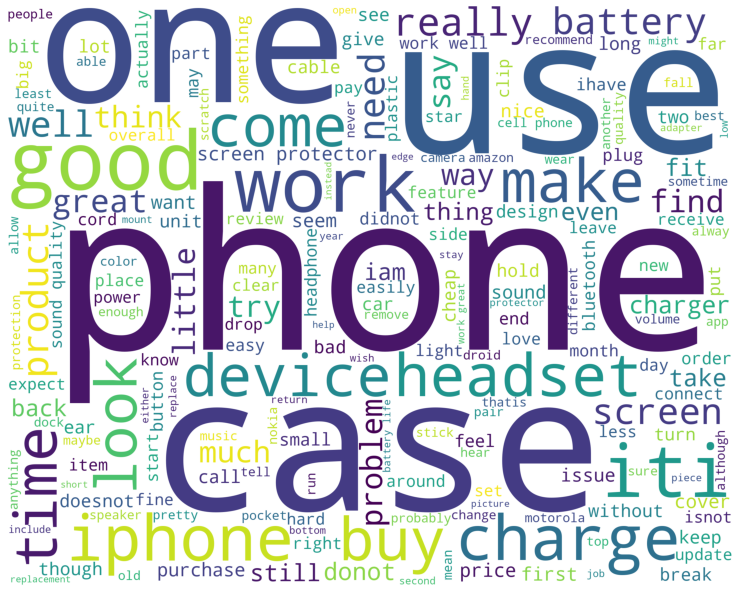

Negative words


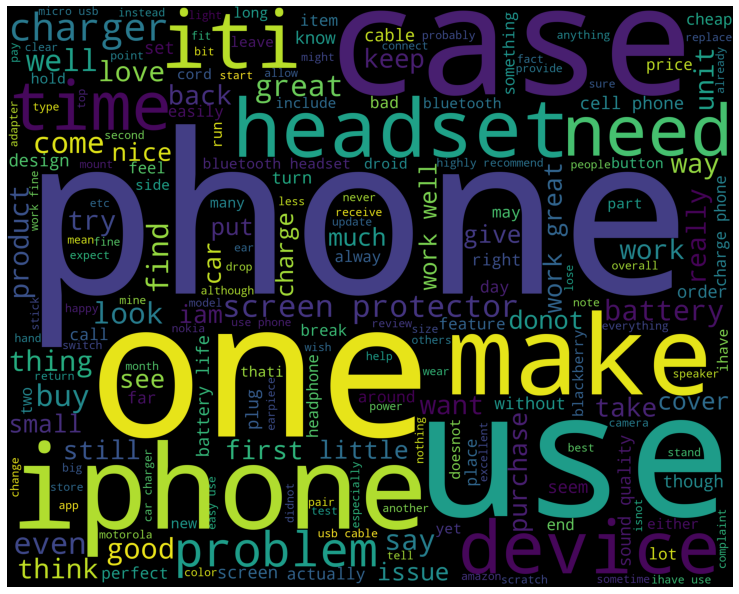

CPU Time: 41.04884195327759


In [ ]:
from wordcloud import WordCloud, STOPWORDS

start_time = time()

positive_words = []
negative_words = []

# Separating out positive and negative words (i.e., words appearing in negative and positive tweets),
# in order to visualize each set of words independently
for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    else:
        negative_words.extend(cleaned_tokens_list[i][0])

# Defining our word cloud drawing function
def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(positive_words, 'white')
print("Negative words")
wordcloud_draw(negative_words)        

print('CPU Time:', time() - start_time)

# Deep Learning Model - LSTM

Deep Learning is a very rapidly growing field, that is proving to be extremely beneficial in various scenarios. One of those scenarios, which we will be studying in this notebook, is the ability to process text data in a much more complex and powerful manner. In fact, in the next section of the notebook I will be focusing on implementing a Deep Learning model that will successfully tackled, such as the lack of relationship between words in a sentence and the poor generalization on previously unseen data.

A Long Short-Term Memory, or LSTM, is a type of machine learning neural networks. More specifically, it belongs to the family of Recurrent Neural Networds (RNN) in Deep Learning, which are specifically conceived in order to process temporal data. Temporal data is defined as data that is highly influenced by the order that it is presented in. This means that data coming before or after a given datum (singular for data) can greatly affect this datum. Text data is an example of temporal data. 



In [13]:
def read_glove_vecs(glove_file):
    with open("glove.6B.50d.txt", 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [14]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [ ]:
word_to_index['hello']

176468

In [ ]:
word_to_vec_map['hello']

array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ])

In [ ]:
word_to_index['unk']

372306

In [15]:
def cosine_similarity(u, v):
    dot = np.dot(u, v)
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    cosine_similarity = dot / (norm_u * norm_v)
    return cosine_similarity

In [ ]:
cosine_similarity(word_to_vec_map['love'], word_to_vec_map['appreciate'])

0.6059468348932878

In [ ]:
cosine_similarity(word_to_vec_map['like'], word_to_vec_map['phone'])

0.5392798942231444

## Data Padding

### Data Transformation

In [16]:
start_time = time()

unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res


def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index

        
# Here I will utilize the already computed 'cleaned_tokens_list' variable
   
print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)

X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))

for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time() - start_time)


print(X[:5])
print(Y[:5])

Removed Noise, CPU Time: 0.0003650188446044922
max_len: 2214
Data Prepared for model, CPU Time: 0.916710615158081
[[225629. 164328. 343129. ...      0.      0.      0.]
 [343135. 389836. 222471. ...      0.      0.      0.]
 [ 64354. 231458. 283483. ...      0.      0.      0.]
 [193838.  60095. 166369. ...      0.      0.      0.]
 [ 64354. 342181. 225629. ...      0.      0.      0.]]
[0. 0. 0. 0. 0.]


## Build the Model

In [17]:
import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.layers.embeddings import Embedding

### Words Embedding

In [18]:
# Defining a function that will initialize and populate our embedding layer

def pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len):
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["unk"].shape[0] #50
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
        
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False, input_shape=(max_len,))
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [19]:
# Defining a sequencial model composed of firstly the embedding layer, than a pair of Bidirectional LSTMs,
# that finally feed into a sigmoid layer that generates our desired output betwene 0 and 1.

model = Sequential()

model.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2214, 50)          20000050  
_________________________________________________________________
bidirectional (Bidirectional (None, 2214, 256)         183296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
_________________________________________________________________


In [20]:
# Compiling the model with a binary cross-entropy loss function, using the default adam optimizer
# and setting the accurary as the metric to track and ameliorate

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

## Training the Model

In [22]:
# Setting a batch size of 20 and training the model for 10 epochs

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
211/211 [==============================] - 162s 716ms/step - loss: 0.3888 - accuracy: 0.8578 - val_loss: 0.3547 - val_accuracy: 0.8822
Epoch 2/20
211/211 [==============================] - 150s 709ms/step - loss: 0.3477 - accuracy: 0.8843 - val_loss: 0.3519 - val_accuracy: 0.8822
Epoch 3/20
211/211 [==============================] - 149s 708ms/step - loss: 0.3431 - accuracy: 0.8845 - val_loss: 0.3544 - val_accuracy: 0.8822
Epoch 4/20
211/211 [==============================] - 150s 710ms/step - loss: 0.3394 - accuracy: 0.8844 - val_loss: 0.3467 - val_accuracy: 0.8822
Epoch 5/20
211/211 [==============================] - 149s 707ms/step - loss: 0.3358 - accuracy: 0.8843 - val_loss: 0.3443 - val_accuracy: 0.8822
Epoch 6/20
211/211 [==============================] - 149s 708ms/step - loss: 0.3307 - accuracy: 0.8842 - val_loss: 0.3465 - val_accuracy: 0.8824
Epoch 7/20
211/211 [==============================] - 149s 706ms/step - loss: 0.3301 - accuracy: 0.8824 - val_loss: 0.3469 -

In [23]:
# Defnining a handy function in order to plot various models accuracy and loss progress

def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

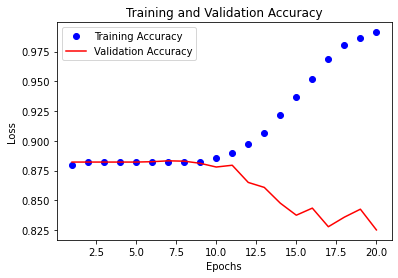

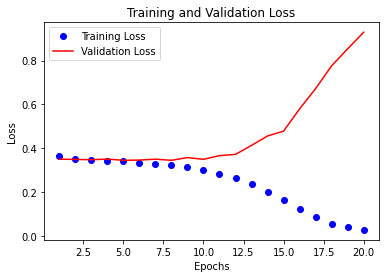

In [ ]:
# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)

## Investigating Possibilities to improve the model


### Regularization - Dropout

### Model Building-Dropout

In [24]:
keras.backend.clear_session()

model_dropout = Sequential()

model_dropout.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_dropout.add(Dense(units=1, activation='sigmoid'))

model_dropout.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2214, 50)          20000050  
_________________________________________________________________
dropout (Dropout)            (None, 2214, 50)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 2214, 256)         183296    
_________________________________________________________________
dropout_1 (Dropout)          (None, 2214, 256)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
______________________________________

In [25]:
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
211/211 [==============================] - 156s 720ms/step - loss: 0.3806 - accuracy: 0.8780 - val_loss: 0.3586 - val_accuracy: 0.8822
Epoch 2/20
211/211 [==============================] - 151s 717ms/step - loss: 0.3596 - accuracy: 0.8804 - val_loss: 0.3553 - val_accuracy: 0.8822
Epoch 3/20
211/211 [==============================] - 151s 715ms/step - loss: 0.3558 - accuracy: 0.8810 - val_loss: 0.3532 - val_accuracy: 0.8822
Epoch 4/20
211/211 [==============================] - 151s 717ms/step - loss: 0.3574 - accuracy: 0.8798 - val_loss: 0.3504 - val_accuracy: 0.8822
Epoch 5/20
211/211 [==============================] - 151s 715ms/step - loss: 0.3478 - accuracy: 0.8818 - val_loss: 0.3488 - val_accuracy: 0.8822
Epoch 6/20
211/211 [==============================] - 151s 716ms/step - loss: 0.3486 - accuracy: 0.8815 - val_loss: 0.3504 - val_accuracy: 0.8822
Epoch 7/20
211/211 [==============================] - 151s 715ms/step - loss: 0.3463 - accuracy: 0.8827 - val_loss: 0.3458 -

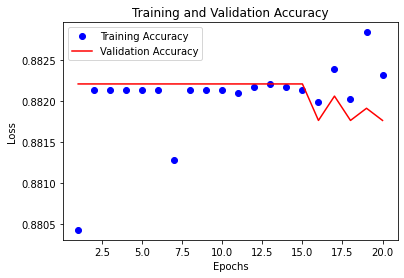

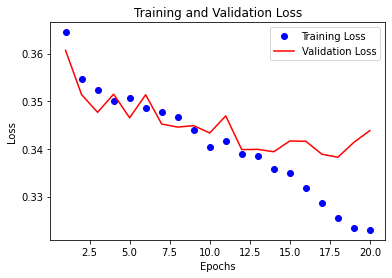

In [ ]:
plot_acc_loss(model_dropout.history)

### Inspecting the Data - Unknown Words 

In [ ]:
unk = word_to_index['unk']

n_unk_words = 0

for x in X:
    for y in x:
        if y == unk:
            n_unk_words += 1

n_unk_words

81446

In [ ]:
print(len(unks), len(UNKS))

81446 82816


In [ ]:
from collections import Counter
Counter(unks).most_common(10)

[('donot', 6068),
 ('ihave', 4634),
 ('doesnot', 3534),
 ('isnot', 1476),
 ('thatis', 1462),
 ('iwould', 1111),
 ('wasnot', 959),
 ('havenot', 928),
 ('iwil', 871),
 ('wouldnot', 831)]

### Further data cleaning

In [27]:
# A custom function defined in order to fine-tune the cleaning of the input text.
# This function is being "upgraded" such that it performs a more thourough cleaning of the data
# in order to better fit the words embedding layer
def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow' or token == '2moro':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token in ['hahah', 'hahaha', 'hahahaha']:
        return 'haha'
    if token == "mother's":
        return "mother"
    if token == "mom's":
        return "mom"
    if token == "dad's":
        return "dad"
    if token == 'bday' or token == 'b-day':
        return 'birthday'
    if token in ["i'm", "don't", "can't", "couldn't", "aren't", "wouldn't", "isn't", "didn't", "hadn't",
                 "doesn't", "won't", "haven't", "wasn't", "hasn't", "shouldn't", "ain't", "they've"]:
        return token.replace("'", "")
    if token in ['lmao', 'lolz', 'rofl']:
        return 'lol'
    if token == '<3':
        return 'love'
    if token == 'thanx' or token == 'thnx':
        return 'thanks'
    if token == 'goood':
        return 'good'
    if token in ['amp', 'quot', 'lt', 'gt', '½25', '..', '. .', '. . .']:
        return ''
    return token


# This function will be the all-in-one noise removal function
def remove_noise(reviewText_tokens):

    cleaned_tokens = []

    for token in reviewText_tokens:
        # Eliminating the token if it is a link
        token = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''',
                       " ", token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        cleaned_token = cleaned(token.lower())
        
        if cleaned_token == "idk":
            cleaned_tokens.append('i')
            cleaned_tokens.append('dont')
            cleaned_tokens.append('know')
            continue
        if cleaned_token == "i'll":
            cleaned_tokens.append('i')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "you'll":
            cleaned_tokens.append('you')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "we'll":
            cleaned_tokens.append('we')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "it'll":
            cleaned_tokens.append('it')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "it's":
            cleaned_tokens.append('it')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "i've":
            cleaned_tokens.append('i')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "you've":
            cleaned_tokens.append('you')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "we've":
            cleaned_tokens.append('we')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "they've":
            cleaned_tokens.append('they')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "you're":
            cleaned_tokens.append('you')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "we're":
            cleaned_tokens.append('we')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "they're":
            cleaned_tokens.append('they')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "let's":
            cleaned_tokens.append('let')
            cleaned_tokens.append('us')
            continue
        if cleaned_token == "she's":
            cleaned_tokens.append('she')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "he's":
            cleaned_tokens.append('he')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "that's":
            cleaned_tokens.append('that')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "i'd":
            cleaned_tokens.append('i')
            cleaned_tokens.append('would')
            continue
        if cleaned_token == "you'd":
            cleaned_tokens.append('you')
            cleaned_tokens.append('would')
            continue
        if cleaned_token == "there's":
            cleaned_tokens.append('there')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "what's":
            cleaned_tokens.append('what')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "how's":
            cleaned_tokens.append('how')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "who's":
            cleaned_tokens.append('who')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "y'all" or cleaned_token == "ya'll":
            cleaned_tokens.append('you')
            cleaned_tokens.append('all')
            continue

        if cleaned_token.strip() and cleaned_token not in string.punctuation: 
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens


# Prevewing the remove_noise() output
print(remove_noise(data[0][0]))

['they', 'look', 'good', 'and', 'stick', 'good', 'i', 'just', 'donot', 'like', 'the', 'rounded', 'shape', 'because', 'i', 'was', 'always', 'bumping', 'it', 'and', 'siri', 'kept', 'popping', 'up', 'and', 'it', 'was', 'irritating', 'i', 'just', 'will', 'not', 'buy', 'a', 'product', 'like', 'this', 'again']


Now let's re-compute our X and Y arrays according to the newly defined remove_noise function.

In [28]:
start_time = time()

unks = []
UNKS = []

def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res

def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index

cleaned_tokens_list = []

# Removing noise from all the data, using the newly defined function
for tokens, label in data:
    x = remove_noise(tokens)
    if x:
        cleaned_tokens_list.append((x, label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)


X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))


for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time() - start_time)


print(X[:5])
print(Y[:5])

Removed Noise, CPU Time: 13.607542753219604
max_len: 4832
Data Prepared for model, CPU Time: 1.6439878940582275
[[357810. 225629. 164328. ...      0.      0.      0.]
 [357761. 343137. 389836. ...      0.      0.      0.]
 [357761.  58997.  64354. ...      0.      0.      0.]
 [193838.  60096. 188481. ...      0.      0.      0.]
 [ 64354. 342195. 269798. ...      0.      0.      0.]]
[0. 0. 0. 0. 0.]


In [ ]:
unk = word_to_index['unk']

n_unk_words = 0

for x in X:
    for y in x:
        if y == unk:
            n_unk_words += 1

n_unk_words

81167

In [ ]:
from collections import Counter
Counter(unks).most_common(10)

[('donot', 6068),
 ('ihave', 4634),
 ('doesnot', 3534),
 ('isnot', 1476),
 ('thatis', 1462),
 ('iwould', 1111),
 ('wasnot', 959),
 ('havenot', 928),
 ('iwil', 871),
 ('wouldnot', 831)]

In [29]:
keras.backend.clear_session()

model_clean_data = Sequential()

model_clean_data.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_clean_data.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_clean_data.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_clean_data.add(Dense(units=1, activation='sigmoid'))

model_clean_data.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4832, 50)          20000050  
_________________________________________________________________
bidirectional (Bidirectional (None, 4832, 256)         183296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
_________________________________________________________________


In [30]:
model_clean_data.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [ ]:
print(len(X_train), len(X_test))

26880 6721


In [32]:
model_clean_data.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
210/210 [==============================] - 319s 1s/step - loss: 0.3792 - accuracy: 0.8737 - val_loss: 0.3503 - val_accuracy: 0.8822
Epoch 2/20
210/210 [==============================] - 314s 1s/step - loss: 0.3542 - accuracy: 0.8813 - val_loss: 0.3486 - val_accuracy: 0.8822
Epoch 3/20
210/210 [==============================] - 314s 1s/step - loss: 0.3502 - accuracy: 0.8798 - val_loss: 0.3433 - val_accuracy: 0.8822
Epoch 4/20
210/210 [==============================] - 315s 1s/step - loss: 0.3438 - accuracy: 0.8810 - val_loss: 0.3399 - val_accuracy: 0.8822
Epoch 5/20
210/210 [==============================] - 315s 2s/step - loss: 0.3402 - accuracy: 0.8841 - val_loss: 0.3455 - val_accuracy: 0.8822
Epoch 6/20
210/210 [==============================] - 315s 2s/step - loss: 0.3432 - accuracy: 0.8824 - val_loss: 0.3416 - val_accuracy: 0.8822
Epoch 7/20
210/210 [==============================] - 315s 2s/step - loss: 0.3301 - accuracy: 0.8844 - val_loss: 0.3362 - val_accuracy: 0.8820

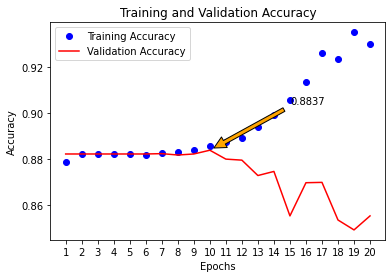

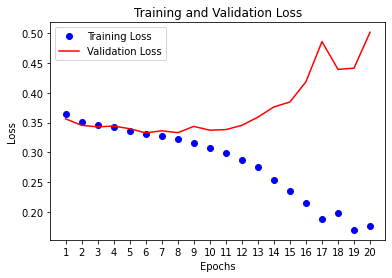

In [ ]:
history = model_clean_data.history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
y_arrow = max(val_acc)
x_arrow = val_acc.index(y_arrow) + 1
plt.annotate(str(y_arrow)[:6],
             (x_arrow, y_arrow),
             xytext=(x_arrow + 5, y_arrow + .02),
             arrowprops=dict(facecolor='orange', shrink=0.05))
plt.xticks(epochs)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
plt.show()

### Predicting on custom data


In [33]:
def sentence_to_indices(sentence_words, max_len):
    X = np.zeros((max_len))
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
        X[j] = index
    return X

def predict_custom_data_sentiment(custom_data):
    # Convert the review such that it can be fed to the model
    x_input = sentence_to_indices(remove_noise(tk.tokenize(custom_data)), max_len)
    
    # Retrun the model's prediction
    return model_clean_data.predict(np.array([x_input])).item()

In [ ]:
predict_custom_data_sentiment("I don't like the form of this phone!")

0.5001821517944336

### Model Evluation

In [34]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
Y_pred = model_clean_data.predict_classes(X_test,batch_size = 128)
confusion_matrix = confusion_matrix(Y_test, Y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Confusion Matrix

In [35]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True score', fontsize=17)
    plt.xlabel('Predicted score', fontsize=17)

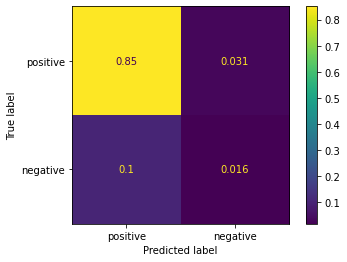

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(Y_test, Y_pred, normalize = 'all')
cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels = ['positive', 'negative'])
cmd.plot()

### Classification Scores

In [37]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93      5929
         1.0       0.34      0.14      0.19       792

    accuracy                           0.87      6721
   macro avg       0.62      0.55      0.56      6721
weighted avg       0.83      0.87      0.84      6721





*   Merging the results from the model_clean_data.predict() with the X_input





In [46]:
pred = model_clean_data.predict(X_test)

y_pred[score] = pd.DataFrame(pred)


In [47]:
y_pred.head()

,0
0,0.009881
1,0.259091
2,0.006298
3,0.012597
4,0.006970


In [45]:
y_pred.to_csv(r'user_name', index=False, header=True)